In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Imbalanced dataset helpers
from imblearn.over_sampling import RandomOverSampler
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

df = pd.read_csv("/content/drive/MyDrive/Data/flight_and_weather_encoded.csv", index_col=0)

Mounted at /content/drive


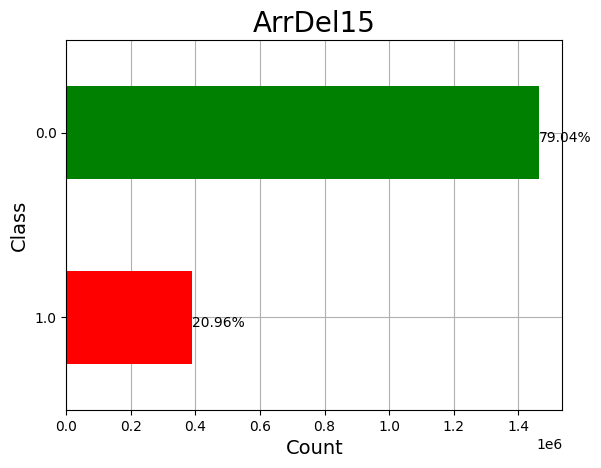

0.0    1463378
1.0     388058
Name: ArrDel15, dtype: int64


In [ ]:
# Plotting the percentage of observations that fall under each class
# Dataset without handling imbalance
ax = df["ArrDel15"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(df["ArrDel15"].value_counts())
fig = ax.get_figure()

In [ ]:
features = df.loc[:, df.columns != "ArrDel15"]
labels = np.asarray(df["ArrDel15"])
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {df.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")
# print(f"{features_train.shape[1]} Features: {features_train.columns.to_list()}")
del features
del labels


Dataset shape: (1851436, 24)
features_train shape: (1481148, 23) | features_test shape: (370288, 23)
labels_train shape: (1481148,) | labels_test shape: (370288,)


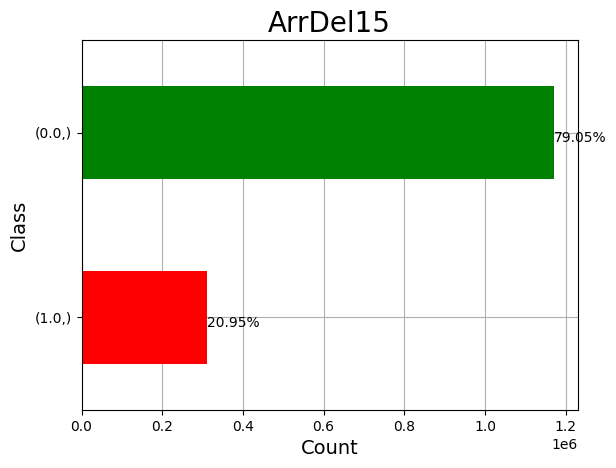

0.0    1170848
1.0     310300
dtype: int64


In [ ]:
# Plotting the percentage of observations that fall under each class
# Training data without handling imbalance
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()

In [ ]:
#Random Oversampling
ros = RandomOverSampler(random_state=42)
features_train, labels_train = ros.fit_resample(features_train, labels_train)

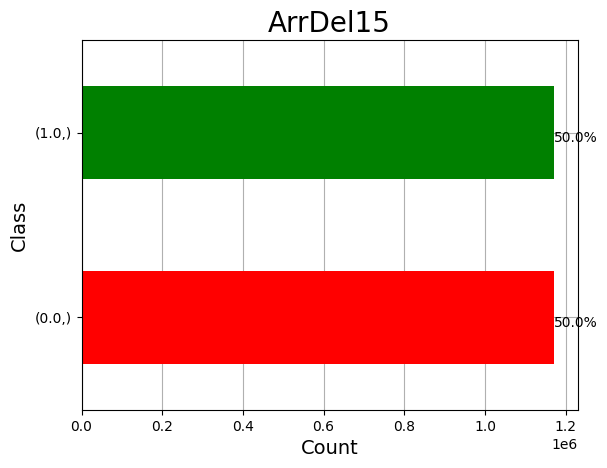

0.0    1170848
1.0    1170848
dtype: int64


In [ ]:
#Balancing the Training Data
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()

Logistic Regression

In [ ]:
model = LogisticRegression(n_jobs=-1)
model.fit(features_train, labels_train)
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
del model
del model_pred

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    292530
         1.0       0.74      0.78      0.76     77758

    accuracy                           0.90    370288
   macro avg       0.84      0.85      0.85    370288
weighted avg       0.90      0.90      0.90    370288



Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
del model
del model_pred

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92    292530
         1.0       0.69      0.70      0.70     77758

    accuracy                           0.87    370288
   macro avg       0.81      0.81      0.81    370288
weighted avg       0.87      0.87      0.87    370288



Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier()
model.fit(features_train, labels_train)
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
del model
del model_pred

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93    292530
         1.0       0.73      0.79      0.76     77758

    accuracy                           0.90    370288
   macro avg       0.84      0.86      0.85    370288
weighted avg       0.90      0.90      0.90    370288



Random Forest

In [ ]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(features_train, labels_train)
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
del model
del model_pred

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94    292530
         1.0       0.82      0.74      0.78     77758

    accuracy                           0.91    370288
   macro avg       0.88      0.85      0.86    370288
weighted avg       0.91      0.91      0.91    370288



Extra Trees Classifier

In [ ]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(features_train, labels_train)
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94    292530
         1.0       0.81      0.73      0.77     77758

    accuracy                           0.91    370288
   macro avg       0.87      0.84      0.86    370288
weighted avg       0.91      0.91      0.91    370288

